<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>NLP with Deep Learning for Everyone</h1>
<h1>Sequence Modeling</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt 

from tqdm import tqdm
tqdm.pandas()

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.datasets import imdb
from keras.preprocessing import sequence

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 8801591afe33ef1c28d30251bd0bd059ce84da3a

numpy     : 1.19.2
matplotlib: 3.3.2
json      : 2.0.9
keras     : 2.4.3
tensorflow: 2.5.0
pandas    : 1.1.3
watermark : 2.1.0



Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load the IMDB dataset

In [4]:
top_words = 10000
max_words = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

word_dict = imdb.get_word_index()
word_list = ["<PAD>", "<START>", "<UNK>", "<UNUSED>"]
word_list.extend([k for k, v in sorted(word_dict.items(), key = lambda x:x[1])])
word_list = np.array(word_list)

In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# SimpleRNN model

In [6]:
model = Sequential()
model.add(Embedding(top_words, 32))

model.add(SimpleRNN(32))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 38s 120ms/step - loss: 0.6425 - accuracy: 0.6089 - val_loss: 0.4554 - val_accuracy: 0.8002
Epoch 2/10
196/196 [==============================] - 22s 114ms/step - loss: 0.4393 - accuracy: 0.8149 - val_loss: 0.3821 - val_accuracy: 0.8396
Epoch 3/10
196/196 [==============================] - 25s 130ms/step - loss: 0.2750 - accuracy: 0.8940 - val_loss: 0.3617 - val_accuracy: 0.8478
Epoch 4/10
196/196 [==============================] - 40s 206ms/step - loss: 0.2059 - accuracy: 0.9239 - val_loss: 0.3745 - val_accuracy: 0.8503
Epoch 5/10
196/196 [==============================] - 40s 206ms/step - loss: 0.1343 - accuracy: 0.9557 - val_loss: 0.4243 - val_accuracy: 0.8396
Epoch 6/10
196/196 [==============================] - 41s 208ms/step - loss: 0.0753 - accuracy: 0.9769 - val_loss: 0.5048 - val_accuracy: 0.8191
Epoch 7/10
196/196 [==============================] - 51s 259ms/step - loss: 0.0569 - accuracy: 0.9852 - val_loss: 0.5671 - val_ac

In [8]:
def plot_history(history):    
    fig, ax_lst = plt.subplots(1, 2, sharex=True, sharey=True)

    epochs = np.array(history.epoch) + 1
    
    ax_lst[0].plot(epochs, history.history['loss'], label='Training')
    ax_lst[0].plot(epochs, history.history['val_loss'], label='Testing')
    ax_lst[0].set_ylabel('Loss')
    ax_lst[0].set_xlabel('Epoch')
    ax_lst[0].set_xticks(epochs)
    
    best_epoch = np.argmin(history.history['val_loss']) + 1
    ax_lst[0].axvline(x=best_epoch, linestyle=':', color=colors[2])
    ax_lst[0].legend()
    

    ax_lst[1].plot(epochs, history.history['accuracy'], label='Training')
    ax_lst[1].plot(epochs, history.history['val_accuracy'], label='Testing')
    ax_lst[1].set_ylabel('Accuracy')
    ax_lst[1].set_xlabel('Epoch')
    ax_lst[1].set_xticks(epochs)
    ax_lst[1].axvline(x=best_epoch, linestyle=':', color=colors[2])


    fig.tight_layout()

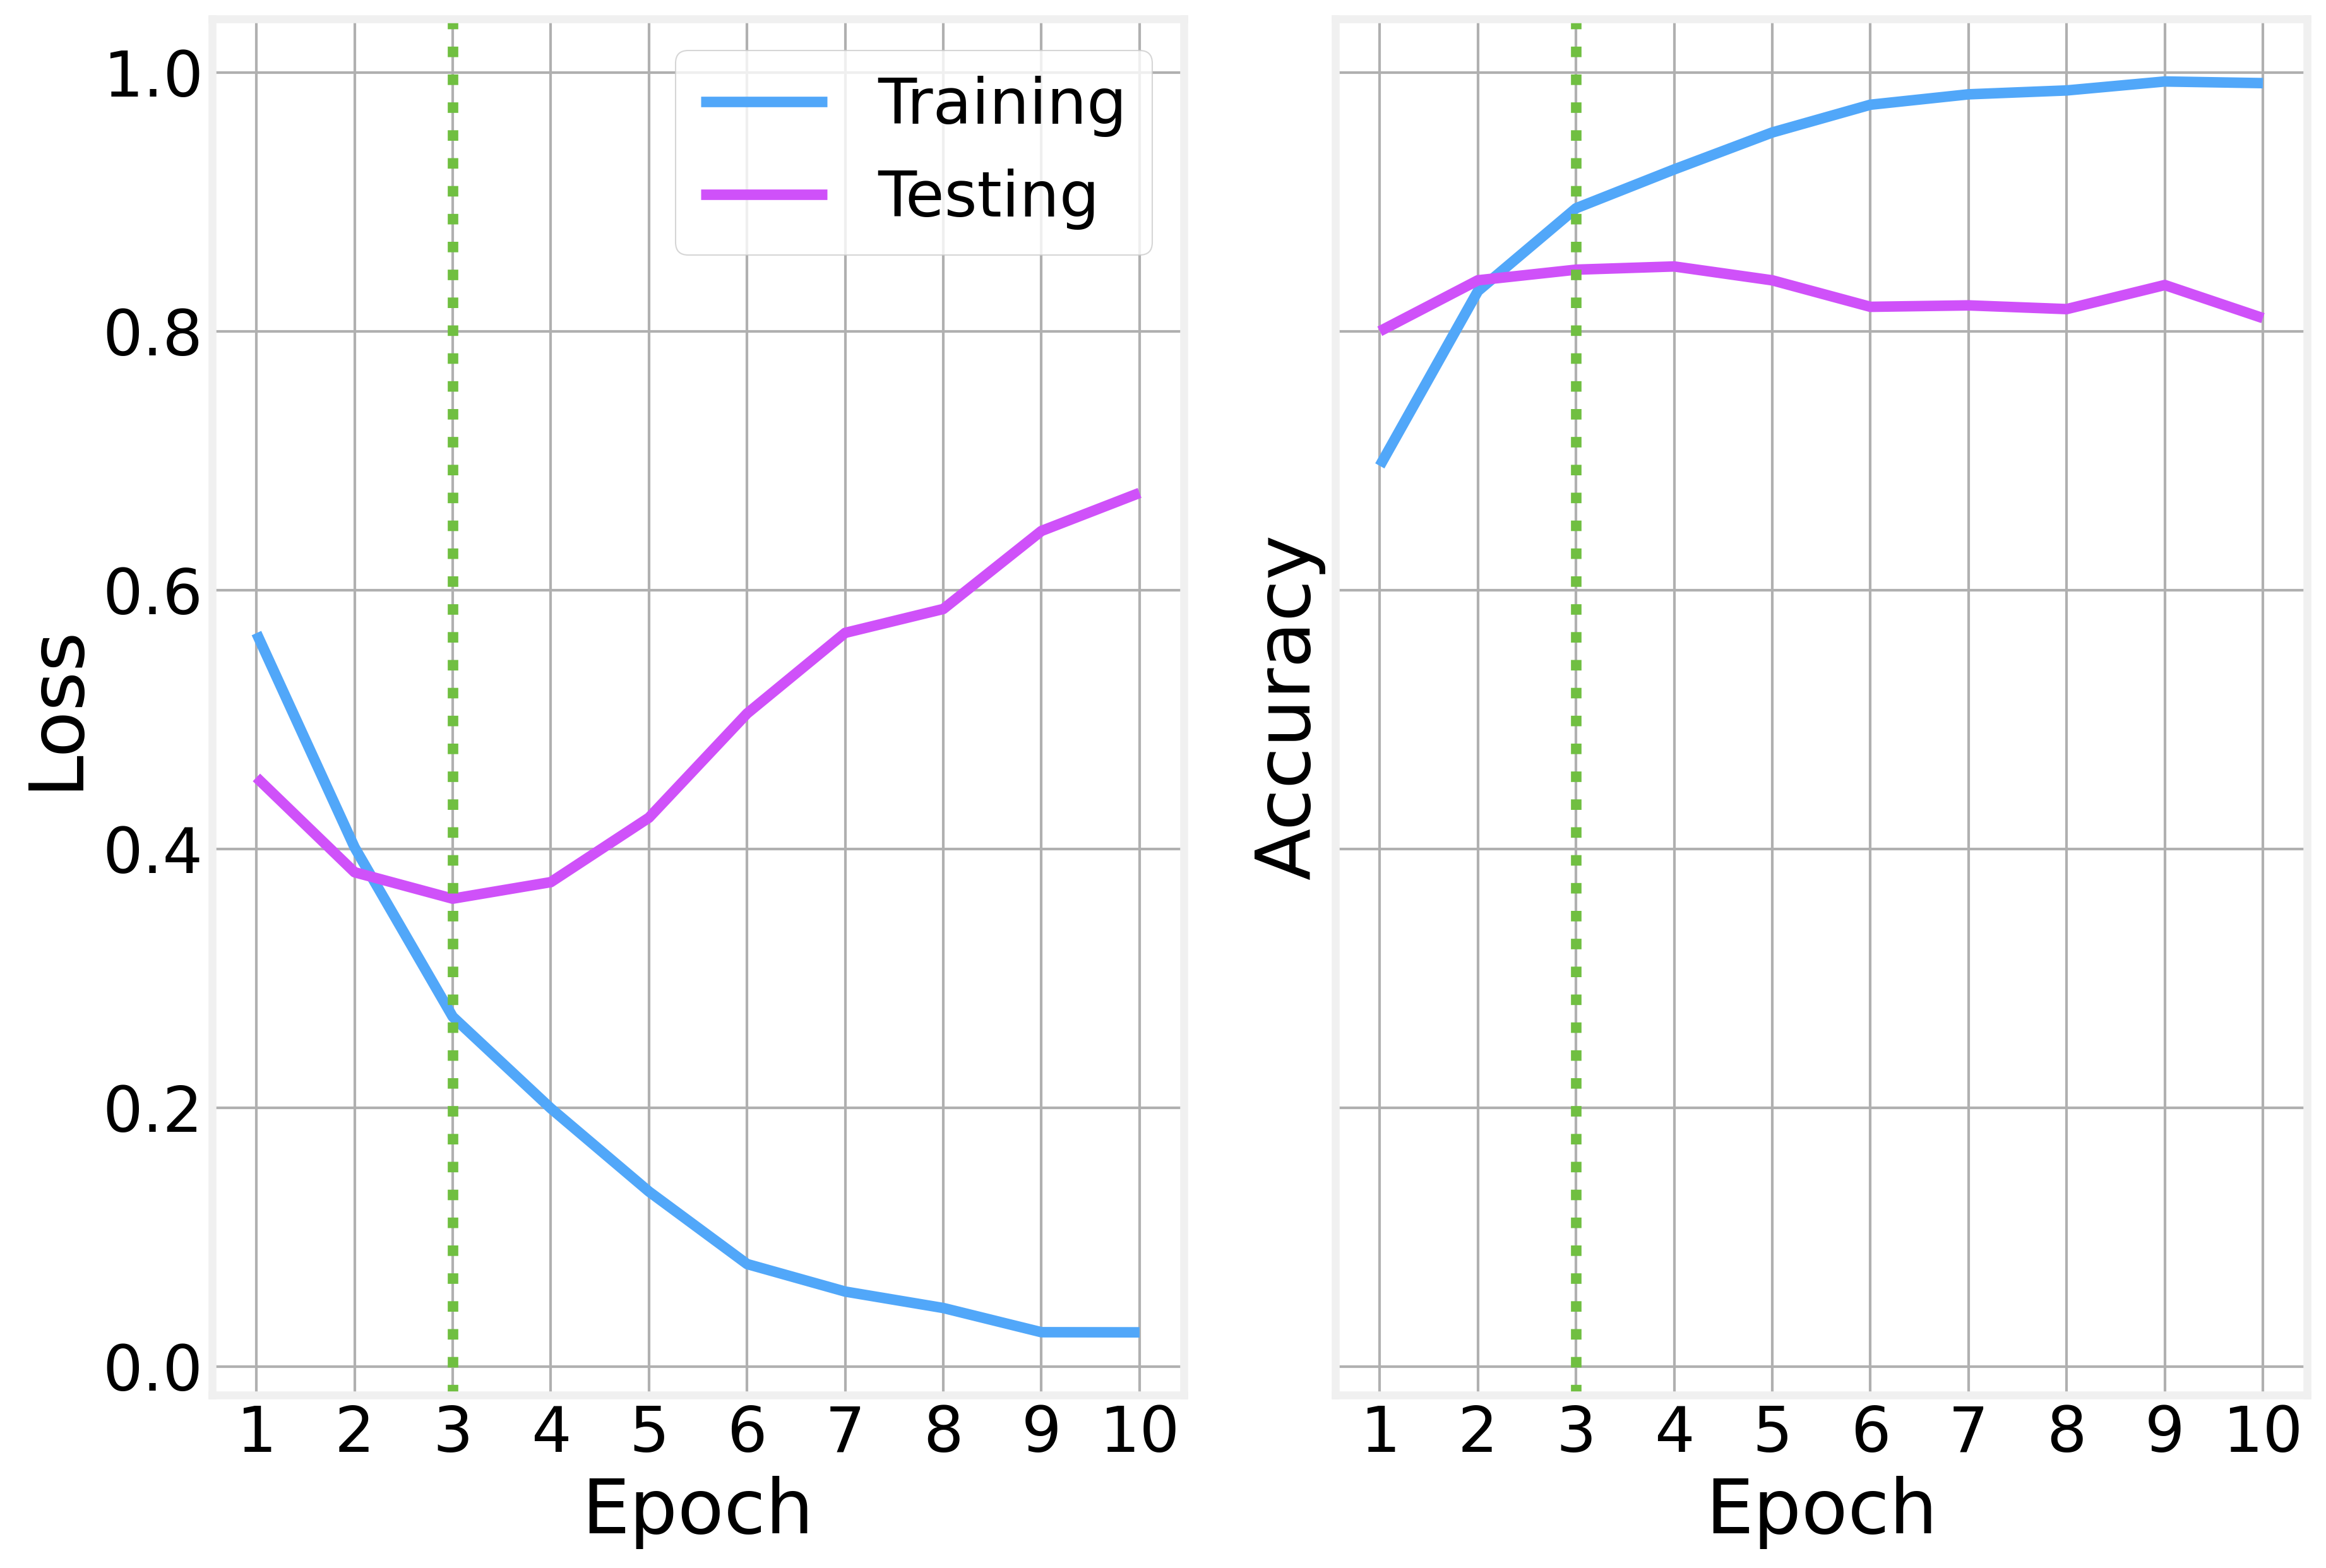

In [9]:
plot_history(history)

# GRU

In [10]:
model = Sequential()
model.add(Embedding(top_words, 32))

model.add(GRU(32))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 42s 202ms/step - loss: 0.5983 - accuracy: 0.6488 - val_loss: 0.3266 - val_accuracy: 0.8604
Epoch 2/10
196/196 [==============================] - 38s 193ms/step - loss: 0.2596 - accuracy: 0.9008 - val_loss: 0.3405 - val_accuracy: 0.8576
Epoch 3/10
196/196 [==============================] - 35s 180ms/step - loss: 0.1921 - accuracy: 0.9310 - val_loss: 0.3257 - val_accuracy: 0.8724
Epoch 4/10
196/196 [==============================] - 37s 188ms/step - loss: 0.1442 - accuracy: 0.9519 - val_loss: 0.3515 - val_accuracy: 0.8532
Epoch 5/10
196/196 [==============================] - 36s 184ms/step - loss: 0.1354 - accuracy: 0.9545 - val_loss: 0.3975 - val_accuracy: 0.8660
Epoch 6/10
196/196 [==============================] - 36s 182ms/step - loss: 0.0979 - accuracy: 0.9690 - val_loss: 0.3961 - val_accuracy: 0.8581
Epoch 7/10
196/196 [==============================] - 37s 190ms/step - loss: 0.0853 - accuracy: 0.9744 - val_loss: 0.4269 - val_ac

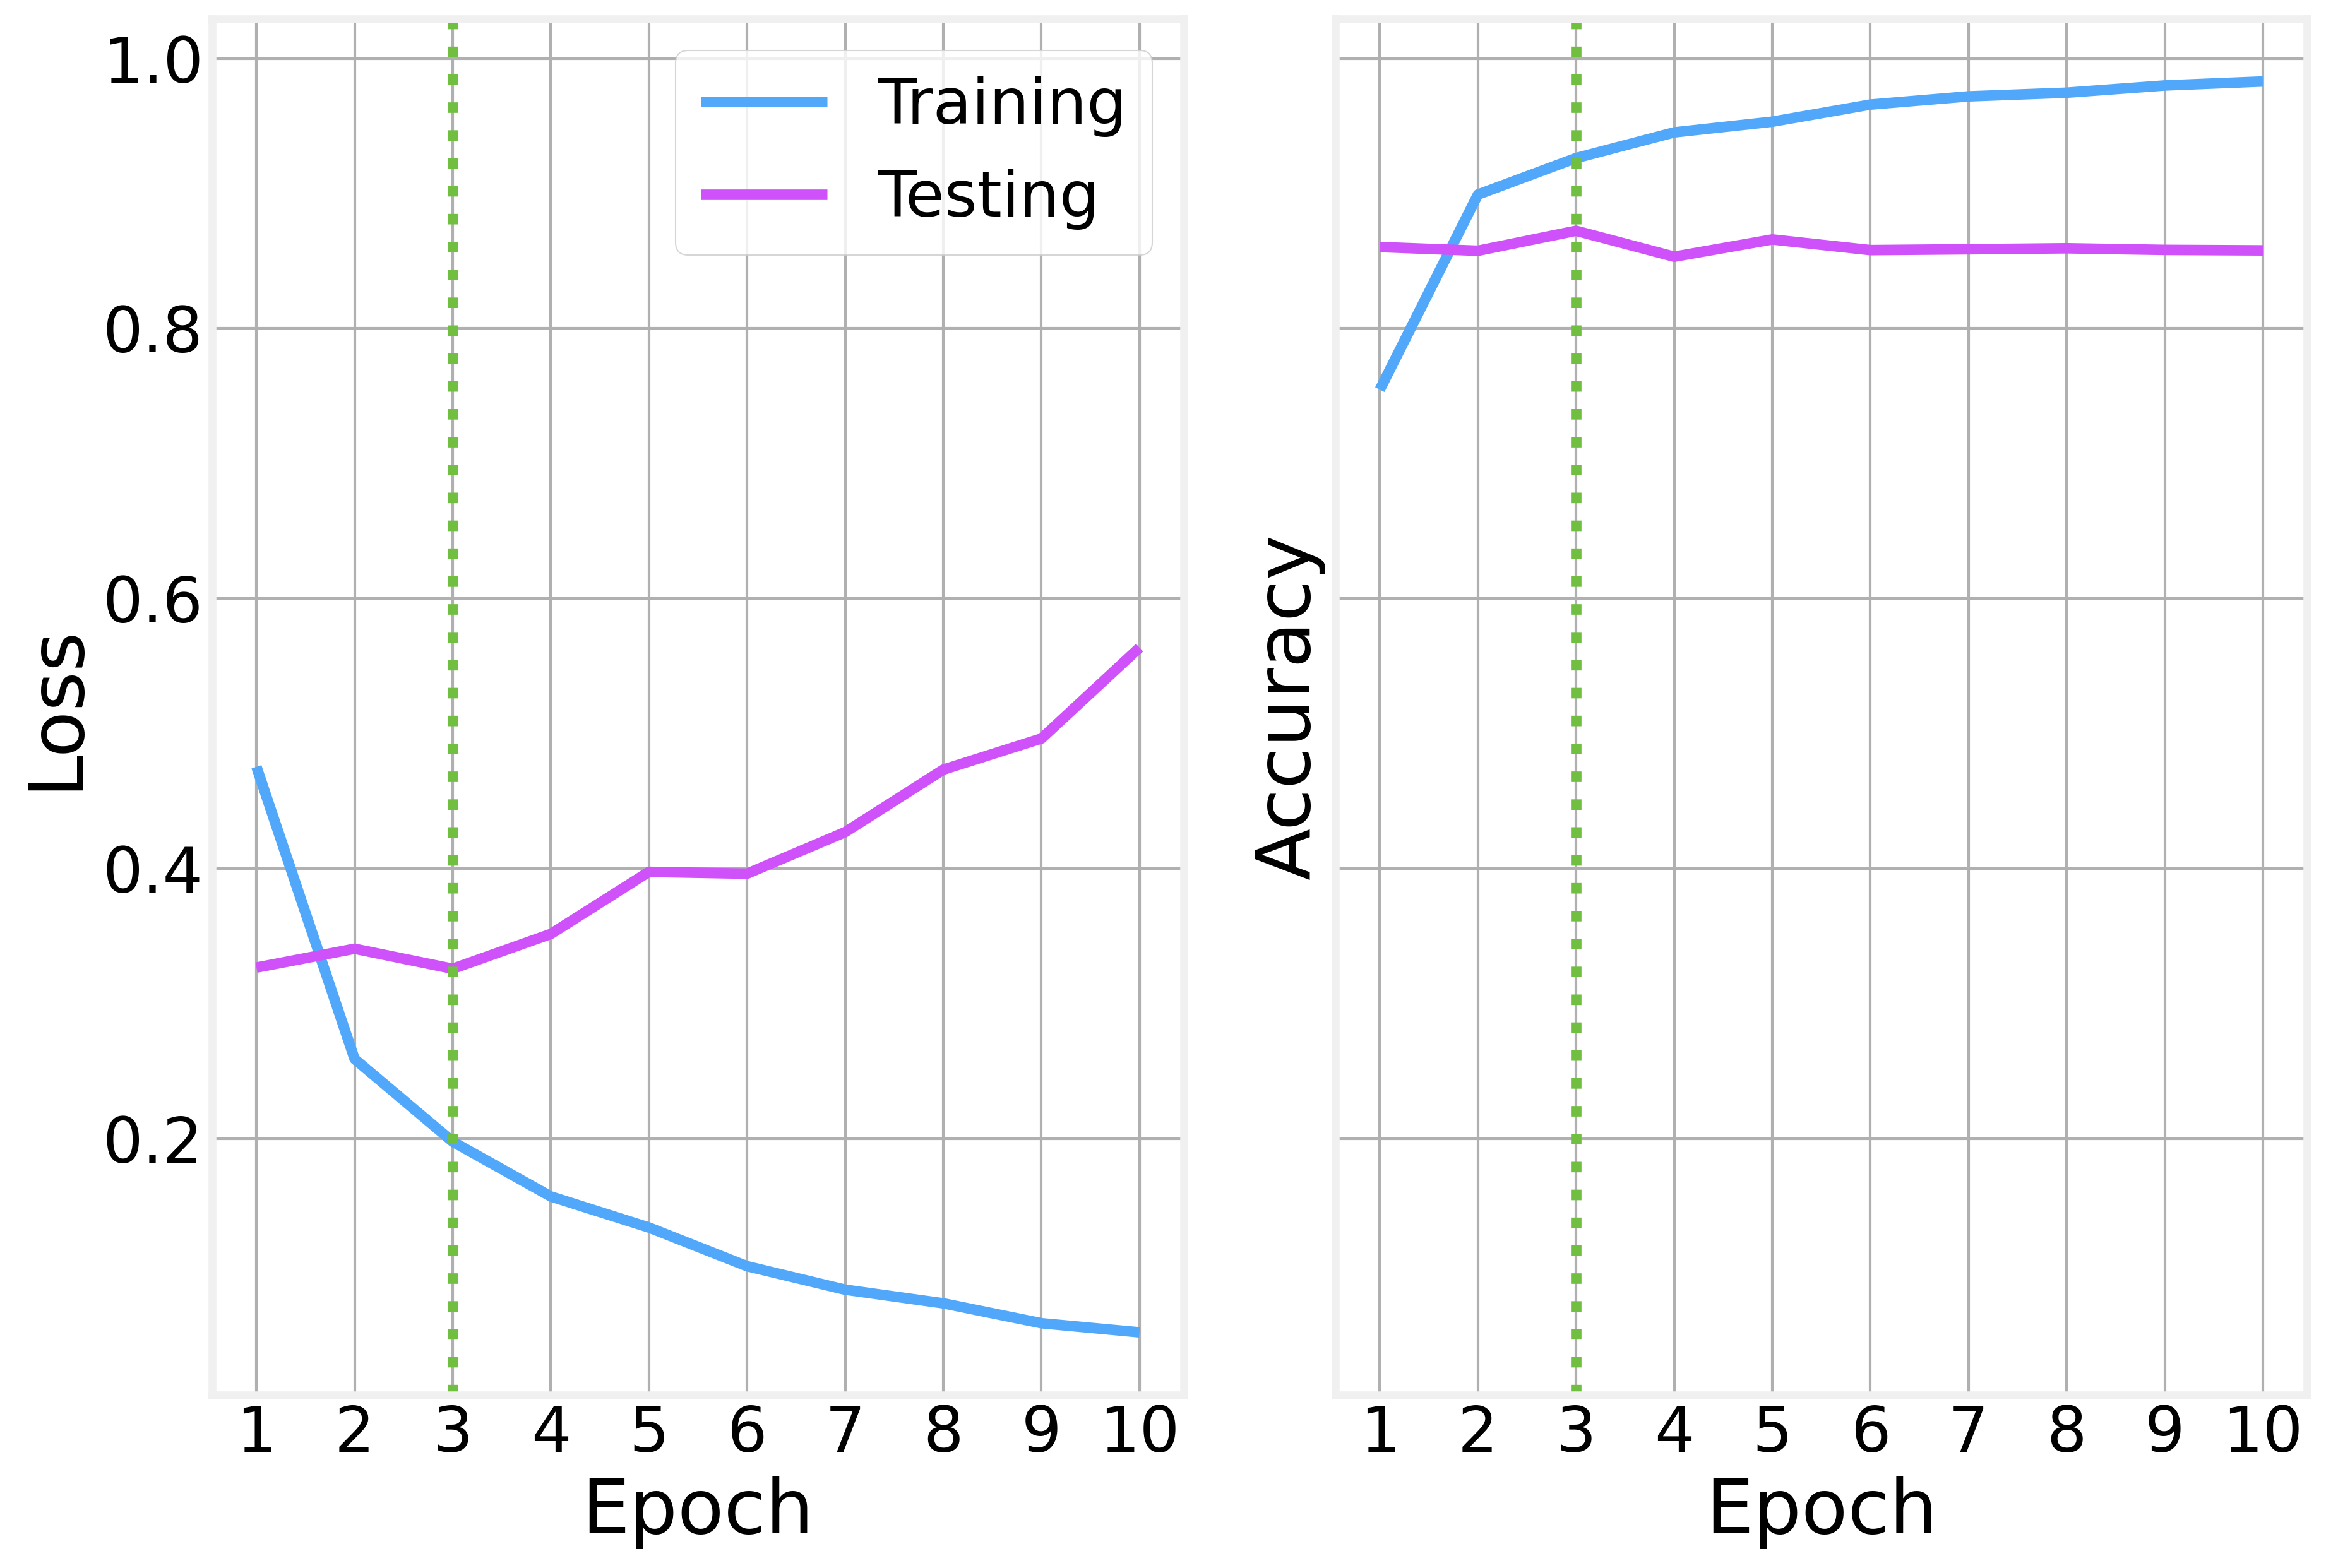

In [12]:
plot_history(history)

# LSTM

In [13]:
model = Sequential()
model.add(Embedding(top_words, 32))

model.add(LSTM(32))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 52s 248ms/step - loss: 0.6262 - accuracy: 0.6459 - val_loss: 0.3887 - val_accuracy: 0.8392
Epoch 2/10
196/196 [==============================] - 43s 222ms/step - loss: 0.5007 - accuracy: 0.8017 - val_loss: 0.3663 - val_accuracy: 0.8499
Epoch 3/10
196/196 [==============================] - 42s 214ms/step - loss: 0.3816 - accuracy: 0.8557 - val_loss: 0.3542 - val_accuracy: 0.8544
Epoch 4/10
196/196 [==============================] - 42s 213ms/step - loss: 0.2575 - accuracy: 0.9080 - val_loss: 0.3722 - val_accuracy: 0.8428
Epoch 5/10
196/196 [==============================] - 41s 208ms/step - loss: 0.2221 - accuracy: 0.9216 - val_loss: 0.3485 - val_accuracy: 0.8617
Epoch 6/10
196/196 [==============================] - 41s 212ms/step - loss: 0.1758 - accuracy: 0.9422 - val_loss: 0.3590 - val_accuracy: 0.8631
Epoch 7/10
196/196 [==============================] - 43s 222ms/step - loss: 0.1512 - accuracy: 0.9514 - val_loss: 0.3604 - val_ac

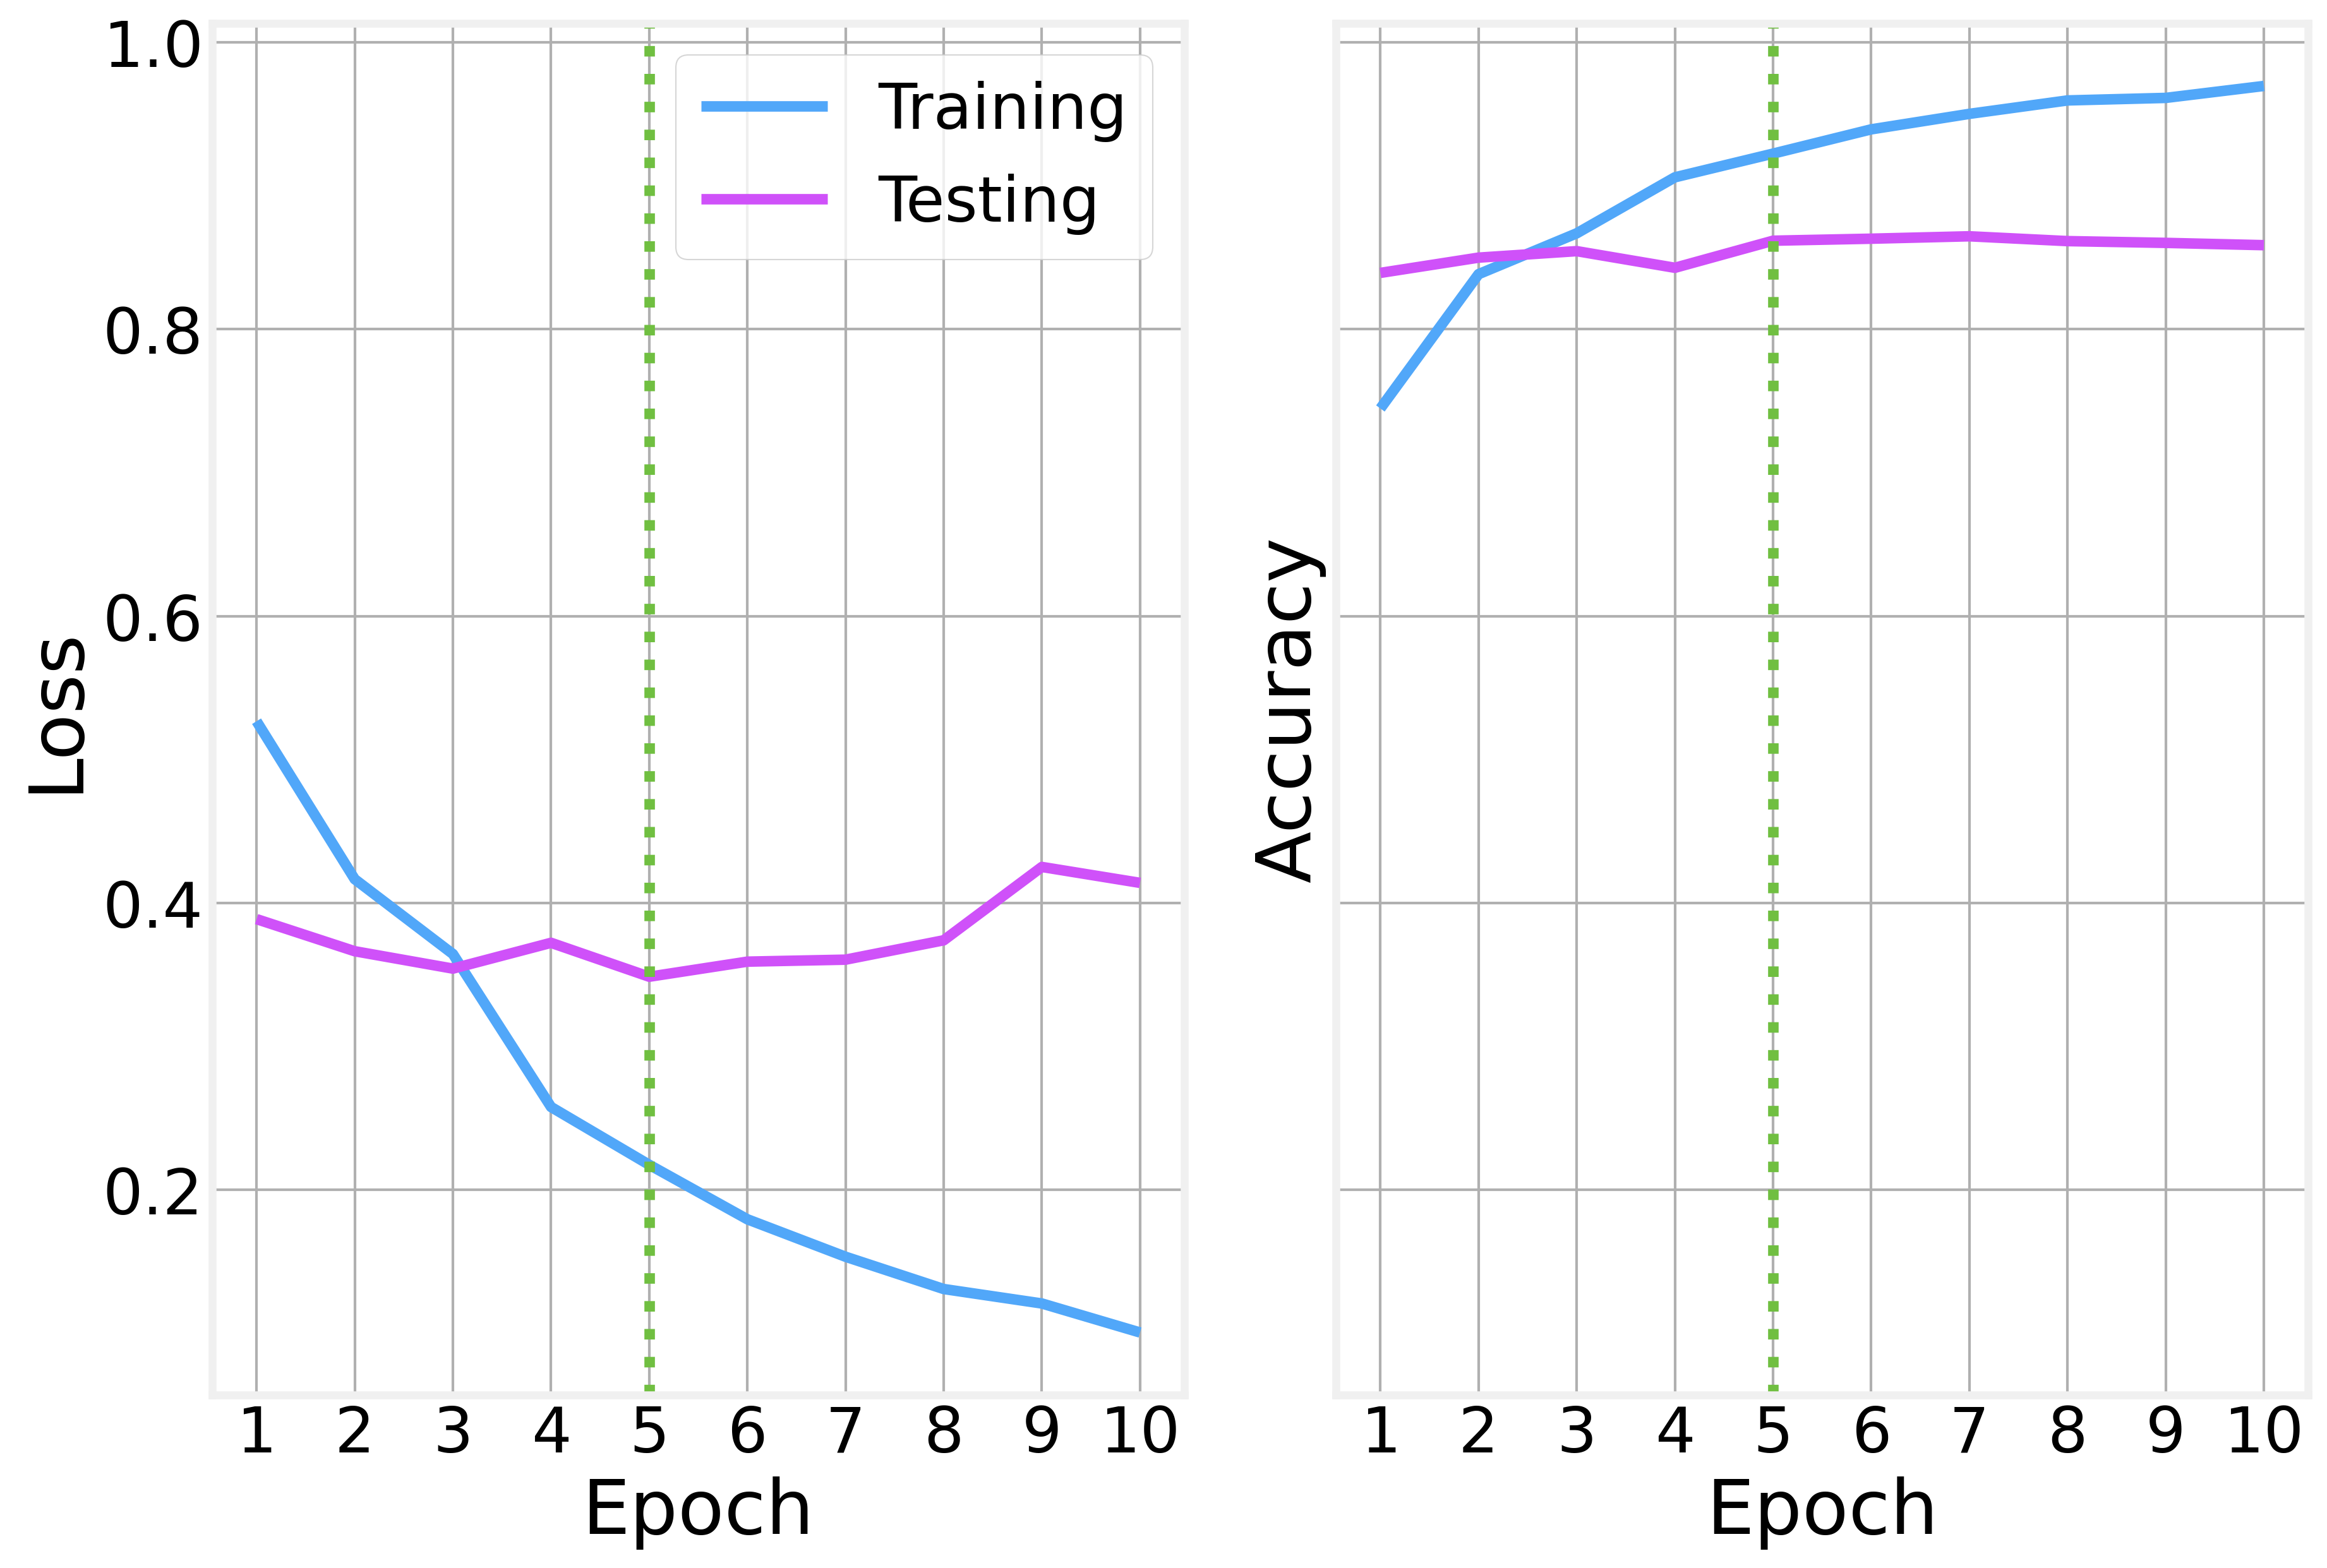

In [15]:
plot_history(history)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>